In [3]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Read dataset
data = pd.read_csv('wine-class.csv')

In [5]:
# check the size
data.shape

(178, 14)

In [6]:
data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.min()

class                              1.00
alcohol                           11.03
 malic_acid                        0.74
 ash                               1.36
 alcalinity_of_ash                10.60
 magnesium                        70.00
 total_phenols                     0.98
 flavanoids                        0.34
 nonflavanoid_phenols              0.13
 proanthocyanins                   0.41
 color_intensity                   1.28
 hue                               0.48
 od280/od315_of_diluted_wines      1.27
 proline                         278.00
dtype: float64

In [8]:
data.max()

class                               3.00
alcohol                            14.83
 malic_acid                         5.80
 ash                                3.23
 alcalinity_of_ash                 30.00
 magnesium                        162.00
 total_phenols                      3.88
 flavanoids                         5.08
 nonflavanoid_phenols               0.66
 proanthocyanins                    3.58
 color_intensity                   13.00
 hue                                1.71
 od280/od315_of_diluted_wines       4.00
 proline                         1680.00
dtype: float64

In [9]:
# check missing values
data.isnull().sum()

class                            0
alcohol                          0
 malic_acid                      0
 ash                             0
 alcalinity_of_ash               0
 magnesium                       3
 total_phenols                   0
 flavanoids                      0
 nonflavanoid_phenols            0
 proanthocyanins                 0
 color_intensity                 0
 hue                             2
 od280/od315_of_diluted_wines    7
 proline                         0
dtype: int64

In [10]:
data.columns = data.columns.str.strip()

In [11]:
data.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       3
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             2
od280/od315_of_diluted_wines    7
proline                         0
dtype: int64

In [12]:
# Clean data
data['magnesium'] = data['magnesium'].replace(np.NaN, data['magnesium'].median())
data['hue'] = data['hue'].replace(np.NaN, data['hue'].median())
data['od280/od315_of_diluted_wines'] = data['od280/od315_of_diluted_wines'].replace(np.NaN,
                                                                                    data['od280/od315_of_diluted_wines'].median())

In [13]:
data.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [14]:
# Input features
X = data.drop('class', axis=1)

In [15]:
y = data['class']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

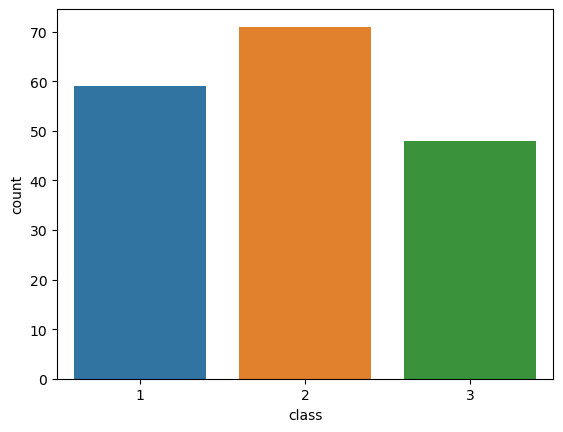

In [16]:
# Count classes
sns.countplot(y)

In [17]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
dtypes: fl

In [19]:
# Transpose
Xt = X.T

In [20]:
# Find duplicated values
print(Xt.duplicated().sum())

0


In [21]:
correlated_features = set()
correlation_matrix = data.corr()  # use persin correlation

In [22]:
correlation_matrix

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.185872,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.612254,-0.782254,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.248474,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.076404,0.070859,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.044607,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.559418,-0.376773,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.265386,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074249,0.000509,0.223626
alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.082783,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.269831,-0.271588,-0.440597
magnesium,-0.185872,0.248474,-0.044607,0.265386,-0.082783,1.000000,0.197636,0.173933,-0.256231,0.233023,0.187929,0.038425,0.058018,0.364597
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.197636,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.431076,0.698247,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.173933,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.539701,0.785765,0.494193
nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256231,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.258862,-0.501044,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.233023,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.294761,0.513334,0.330417


In [23]:
# Remove uncorrelated features
X.drop('ash', axis=1, inplace=True)

In [24]:
X.shape

(178, 12)

In [25]:
# Feature selection

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [27]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

In [28]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5, :])

[[  15.6   127.      3.06    5.64 1065.  ]
 [  11.2   100.      2.76    4.38 1050.  ]
 [  18.6   101.      3.24    5.68 1185.  ]
 [  16.8   113.      3.49    7.8  1480.  ]
 [  21.    118.      2.69    4.32  735.  ]]


In [29]:
X.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
# 1.alcalinity_of_ash 2.magnesium 3.flavanoids 4.color_intensity 5.proline

In [31]:
cols = ['alcalinity_of_ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline']

In [32]:
X = X[cols]

In [33]:
X.head()

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127.0,3.06,5.64,1065
1,11.2,100.0,2.76,4.38,1050
2,18.6,101.0,3.24,5.68,1185
3,16.8,113.0,3.49,7.80,1480
4,21.0,118.0,2.69,4.32,735


In [34]:
# Check outliers and remove it

In [35]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators=100, random_state=0)
isf = isf.fit(X)
clean = isf.predict(X)

In [36]:
X = X[clean==1]
y = y[clean==1]

In [37]:
X.shape

(155, 5)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

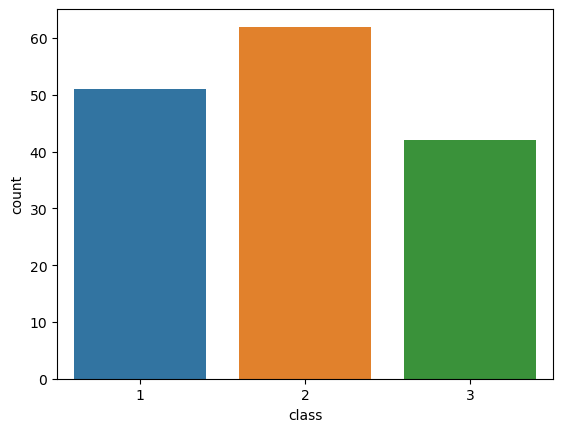

In [38]:
sns.countplot(y)

In [39]:
# Scalling data

In [40]:
X.head()

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127.0,3.06,5.64,1065
1,11.2,100.0,2.76,4.38,1050
2,18.6,101.0,3.24,5.68,1185
4,21.0,118.0,2.69,4.32,735
5,15.2,112.0,3.39,6.75,1450


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [42]:
# Cross validation
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=0)

In [44]:
X_train.shape

(116, 5)

In [45]:
X_test.shape

(39, 5)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#Classfier = GaussianNB()  # Normal
classifier = KNeighborsClassifier(n_neighbors=5)

In [48]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
y_pred

array([1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, 2, 3, 2, 1,
       3, 3, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 19,  0],
       [ 0,  0,  8]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         8

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, y_pred) * 100

100.0

In [59]:
# 15.6	127.0	3.06	5.64	1065

In [60]:
new = [[18.50, 3.0, 0.7, 5.28, 675]]
new = scaler.transform(new)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
classifier.predict(new)

array([2], dtype=int64)

In [62]:
X.head()

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127.0,3.06,5.64,1065
1,11.2,100.0,2.76,4.38,1050
2,18.6,101.0,3.24,5.68,1185
4,21.0,118.0,2.69,4.32,735
5,15.2,112.0,3.39,6.75,1450


In [63]:
new1= [[15.6,127.0,3.06,5.64,1065]]
new1 = scaler.transform(new1)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
classifier.predict(new1)

array([1], dtype=int64)

In [58]:
outputfile = 'wine.model'
import joblib
joblib.dump(scaler, outputfile, compress=9)

['wine.model']

In [95]:
import joblib
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\externals\__init__.py)

In [84]:
outputfile = 'scaler.model'
import joblib
joblib.dump(scaler, outputfile, compress=9)

['scaler.model']

In [98]:
python -m pip install joblib

SyntaxError: invalid syntax (803824201.py, line 1)

In [94]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.
